In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from imports import *
from datetime import datetime, timedelta
import staircase as sc
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv(r"..//data/vessel_queue.csv", parse_dates=['enter', 'leave'], dayfirst=True)
df.sort_values(by=['leave'],inplace=True)

vsteps = Steps.read_dataframe(df.head(150),'enter','leave')
#queue = sc.Stairs(use_dates=True).layer(df.enter, df.leave)


In [3]:
step_dict = vsteps.to_dict()

In [4]:
asteps = Steps.read_array(df.head(150).enter, df.head(150).leave,use_datetime=True)
dsteps = Steps.read_dict(step_dict)
step_dict.keys()[0]

Timestamp('2020-01-01 04:40:00')

In [5]:
df_vsteps = vsteps.to_dataframe() #
df_vsteps.head()

,start,end,value
0,NaT,2020-01-01 04:40:00,1
1,2020-01-01 09:35:00,2020-01-03 12:07:00,1
2,NaT,2020-01-01 11:47:00,1
3,2020-01-01 17:29:00,2020-01-04 04:43:00,1
4,2020-01-01 20:47:00,2020-01-04 08:58:00,1


In [6]:
vsteps_df = Steps.read_dataframe(df_vsteps,'start','end')

<AxesSubplot:>

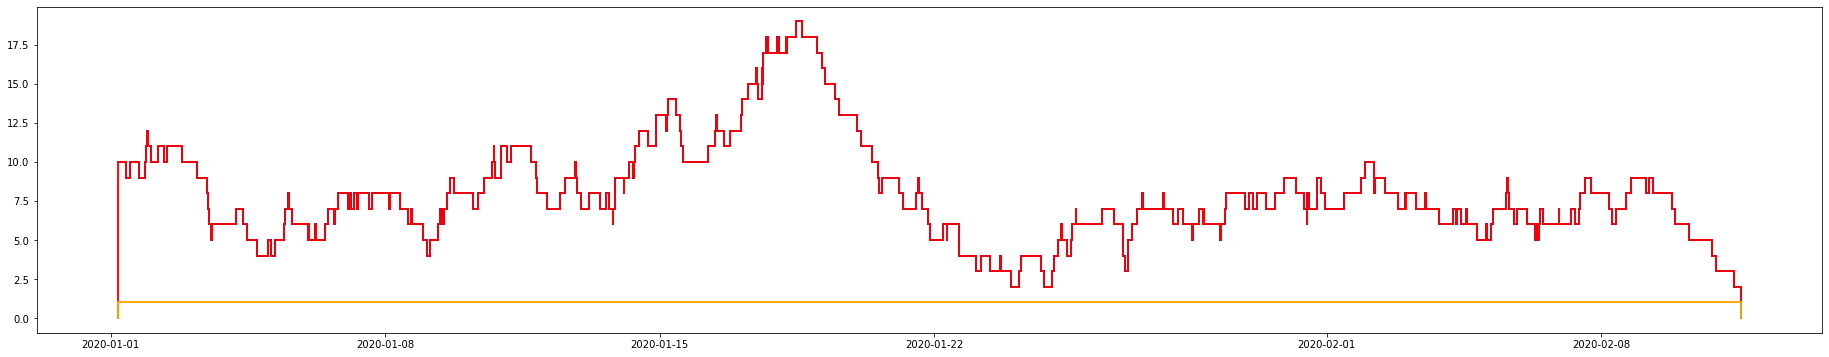

In [7]:
ax = vsteps_df.plot(size=(32,6))
vsteps.plot(ax=ax,color='g')
asteps.plot(ax=ax,color='blue')
dsteps.plot(ax=ax,color='r')
dsteps.normalise().plot(ax=ax,color='orange')

<AxesSubplot:>

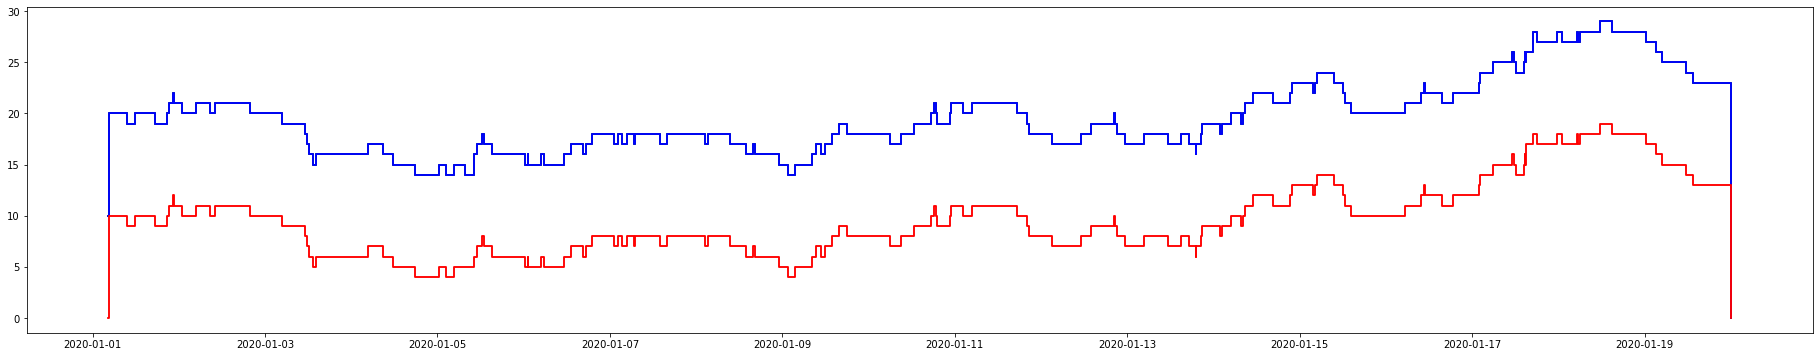

In [9]:
ax = vsteps_df.clip(ubound=pd.Timestamp(2020,1,20)).plot(size=(32,6))
vsteps.clip(ubound=pd.Timestamp(2020,1,20)).plot(ax=ax,color='g')
asteps.clip(ubound=pd.Timestamp(2020,1,20)).plot(ax=ax,color='blue')
dsteps.clip(ubound=pd.Timestamp(2020,1,20)).plot(ax=ax,color='red')


In [11]:
dfdf = vsteps_df.clip(lbound=pd.Timestamp(2020,1,10),ubound=pd.Timestamp(2020,1,20)) #.to_dataframe(mode='aggregate')
vstep_clipped = vsteps.clip(lbound=pd.Timestamp(2020,1,10),ubound=pd.Timestamp(2020,1,20))
#vstep_clipped.steps()